In [44]:
# Import libraries
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')

In [45]:

df = yf.download('MSFT', start = '2013-01-01', end='2023-11-01')

[*********************100%%**********************]  1 of 1 completed


In [46]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,27.250000,27.730000,27.150000,27.620001,22.574514,52899300
2013-01-03,27.629999,27.650000,27.160000,27.250000,22.272108,48294400
2013-01-04,27.270000,27.340000,26.730000,26.740000,21.855274,52521100
2013-01-07,26.770000,26.879999,26.639999,26.690001,21.814409,37110400
2013-01-08,26.750000,26.790001,26.459999,26.549999,21.699982,44703100
...,...,...,...,...,...,...
2023-10-25,345.019989,346.200012,337.619995,340.670013,339.979980,55053800
2023-10-26,340.540009,341.630005,326.940002,327.890015,327.225861,37828500
2023-10-27,330.429993,336.720001,328.399994,329.809998,329.141968,29856500


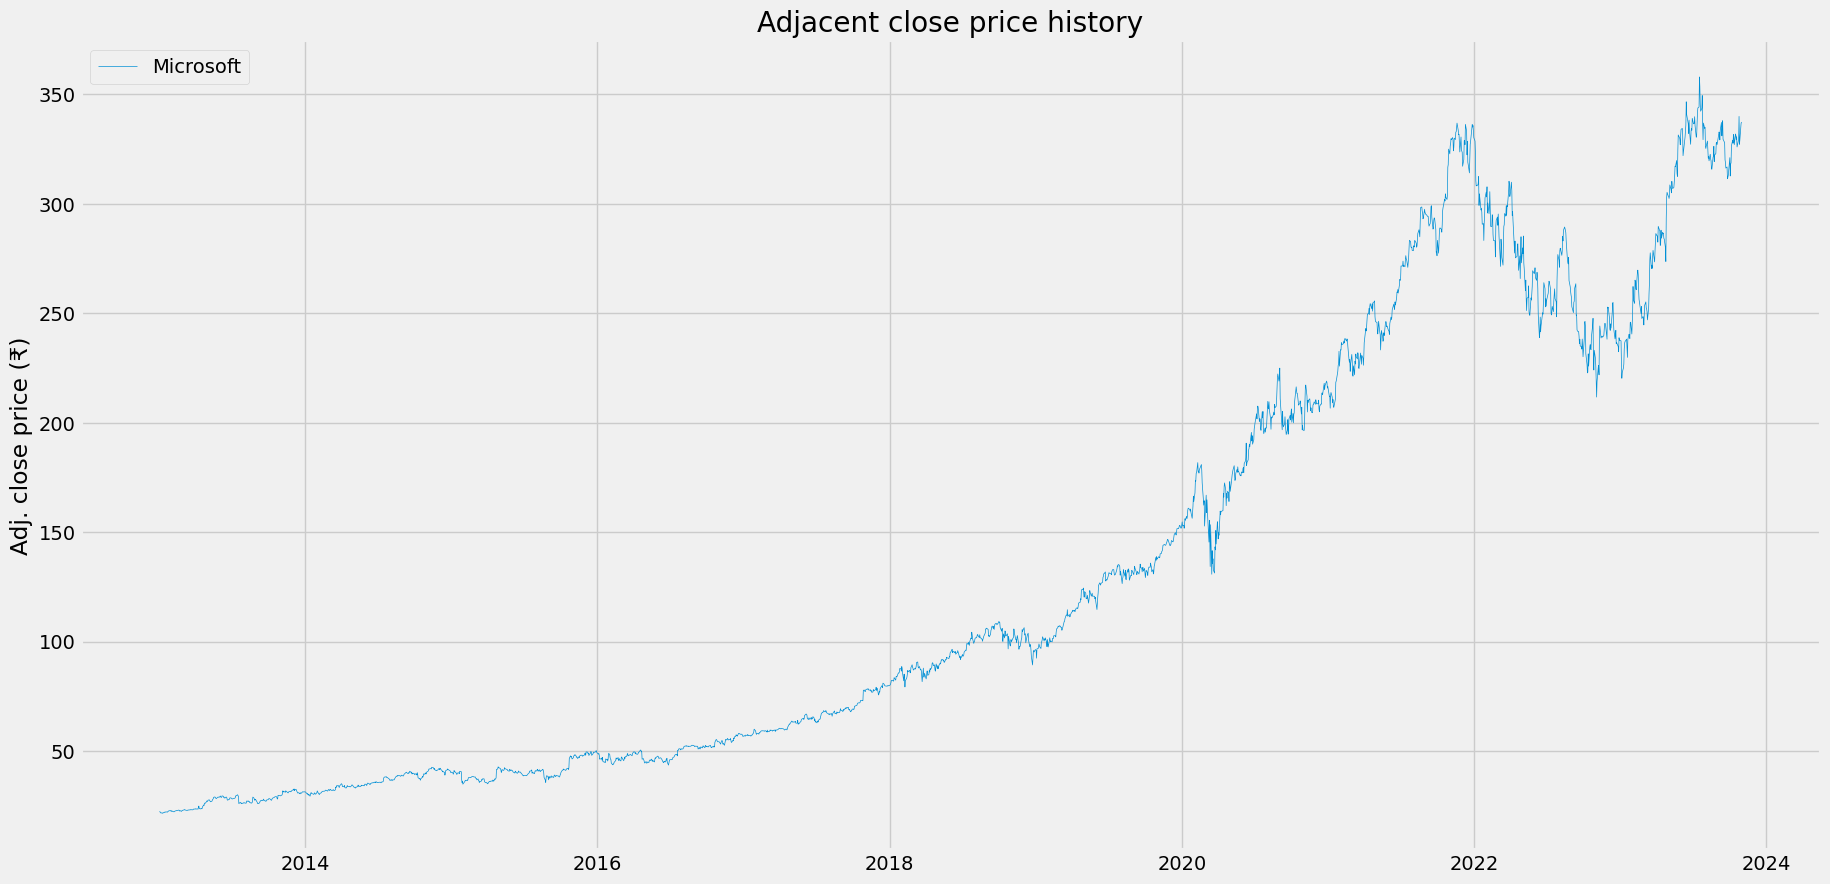

In [47]:
# Visualize df
plt.figure(figsize=(20, 10))
plt.plot(df['Adj Close'], label = "Microsoft", linewidth = 0.5)
plt.title('Adjacent close price history')
plt.ylabel('Adj. close price (₹)')
plt.legend(loc = 'upper left')
plt.show()

In [48]:
# Create SMA Indiacator
SMA20 = pd.DataFrame()
SMA20['Price'] = df['Adj Close'].rolling(window = 20).mean()
SMA50 = pd.DataFrame()
SMA50['Price'] = df['Adj Close'].rolling(window = 50).mean()

In [49]:
# Store all df in new dfFrame
data = pd.DataFrame()
data['Price'] = df['Adj Close']
data['SMA20'] = SMA20['Price']
data['SMA50'] = SMA50['Price']
data['funds'] = 100000         # Initialize funds so that it could be later modified
data

,Price,SMA20,SMA50,funds
Date,,,,
2013-01-02,22.574514,NaN,NaN,100000
2013-01-03,22.272108,NaN,NaN,100000
2013-01-04,21.855274,NaN,NaN,100000
2013-01-07,21.814409,NaN,NaN,100000
2013-01-08,21.699982,NaN,NaN,100000
...,...,...,...,...
2023-10-25,339.979980,325.988364,325.362829,100000
2023-10-26,327.225861,326.699420,325.512326,100000
2023-10-27,329.141968,327.400996,325.770402,100000


In [50]:
# Create a function to signal when to buy and when to sell
def buy_sell_signal(data):
  buy_signal = []
  sell_signal = []
  open_position = []
  funds = [100000] * len(data)
  last_funds = 100000
  flag = 0  # flag = 0 means sell_flag and flag = 1 means buy_flag

  for i in range(len(data)):
    if data['SMA20'][i] > data['SMA50'][i]:
      if flag == 0:
        flag = 1
        buy_signal.append(data['Price'][i])
        last_pos = last_funds / data['Price'][i]
        funds[i] = last_funds
        open_position.append(last_pos)     # buy_quantity with 1 Lac Capital
        sell_signal.append(np.NaN)
      else:
        buy_signal.append(np.NaN)
        last_funds = data['Price'][i] * last_pos
        funds[i] = last_funds
        open_position.append(last_pos)
        sell_signal.append(np.NaN)
    elif data['SMA20'][i] < data['SMA50'][i]:
      if flag == 1:
        flag = 0
        buy_signal.append(np.NaN)
        last_funds = last_pos * data['Price'][i]
        funds[i] = last_funds
        open_position.append(0)
        sell_signal.append(data['Price'][i])
      else:
        buy_signal.append(np.NaN)
        funds[i] = last_funds
        open_position.append(0)
        sell_signal.append(np.NaN)
    else:
      buy_signal.append(np.NaN)
      open_position.append(0)
      sell_signal.append(np.NaN)
  return buy_signal, sell_signal, open_position, funds, flag

In [51]:
import numpy as np
# Store buy and sell in Data
buy_sell = buy_sell_signal(data)
#print(buy_sell)
data['Buy_price'] = buy_sell[0]
data['Sell_price'] = buy_sell[1]
data['Open_pos'] = buy_sell[2]
data['live_pos'] = data['Open_pos'].multiply(data['Price'])
data['funds'] = buy_sell[3]
data.columns

Index(['Price', 'SMA20', 'SMA50', 'funds', 'Buy_price', 'Sell_price',
       'Open_pos', 'live_pos'],
      dtype='object')

In [52]:
data

,Price,SMA20,SMA50,funds,Buy_price,Sell_price,Open_pos,live_pos
Date,,,,,,,,
2013-01-02,22.574514,NaN,NaN,100000.000000,NaN,NaN,0.000000,0.000000
2013-01-03,22.272108,NaN,NaN,100000.000000,NaN,NaN,0.000000,0.000000
2013-01-04,21.855274,NaN,NaN,100000.000000,NaN,NaN,0.000000,0.000000
2013-01-07,21.814409,NaN,NaN,100000.000000,NaN,NaN,0.000000,0.000000
2013-01-08,21.699982,NaN,NaN,100000.000000,NaN,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2023-10-25,339.979980,325.988364,325.362829,366725.248556,339.97998,NaN,1078.667185,366725.248556
2023-10-26,327.225861,326.699420,325.512326,352967.797973,NaN,NaN,1078.667185,352967.797973
2023-10-27,329.141968,327.400996,325.770402,355034.639909,NaN,NaN,1078.667185,355034.639909


In [57]:
data['funds'].diff()

Date
2013-01-02             NaN
2013-01-03        0.000000
2013-01-04        0.000000
2013-01-07        0.000000
2013-01-08        0.000000
                  ...     
2023-10-25        0.000000
2023-10-26   -13757.450583
2023-10-27     2066.841936
2023-10-30     8073.610571
2023-10-31      861.175910
Name: funds, Length: 2727, dtype: float64

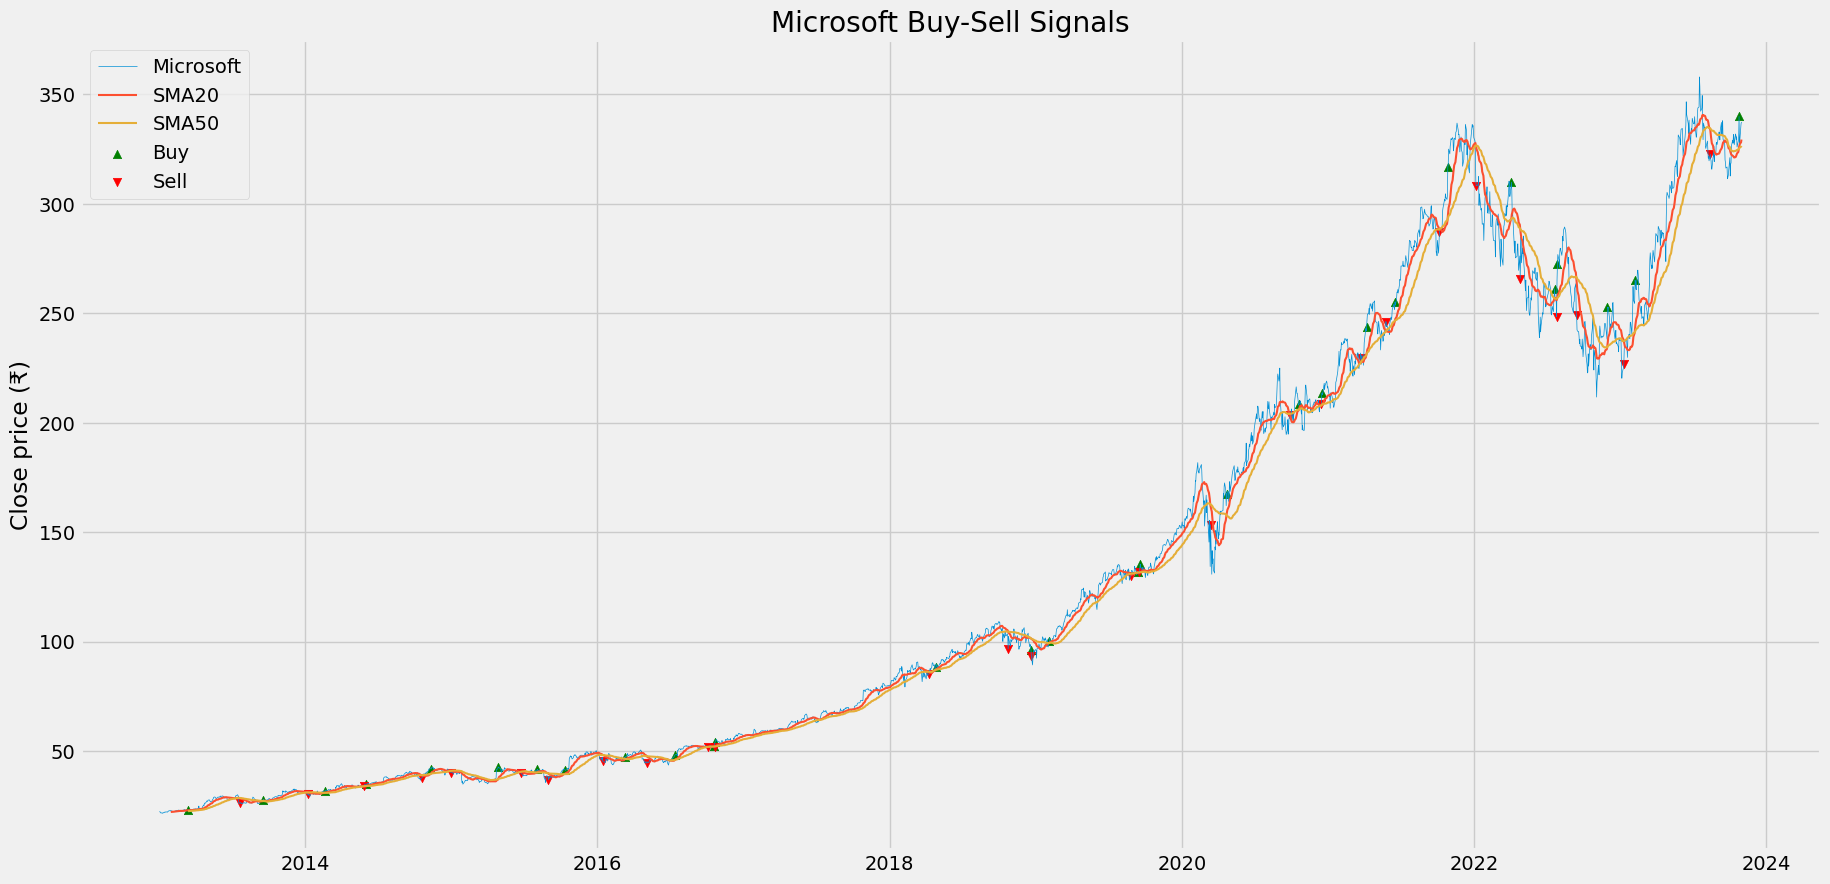

In [53]:

# Visualize Data and strategy to buy and sell NIFTY
plt.figure(figsize = (20, 10))
plt.plot(data['Price'], label = str("Microsoft"), linewidth = 0.5)
plt.plot(data['SMA20'], label = 'SMA20', linewidth = 1.5)
plt.plot(data['SMA50'], label = 'SMA50', linewidth = 1.5)
plt.scatter(data.index, data['Buy_price'], label= 'Buy', marker = '^', color = 'g')
plt.scatter(data.index, data['Sell_price'], label= 'Sell', marker = 'v', color = 'r')
plt.title(str("Microsoft") + ' Buy-Sell Signals')

plt.ylabel('Close price (₹)')
plt.legend(loc = 'upper left')
plt.show()

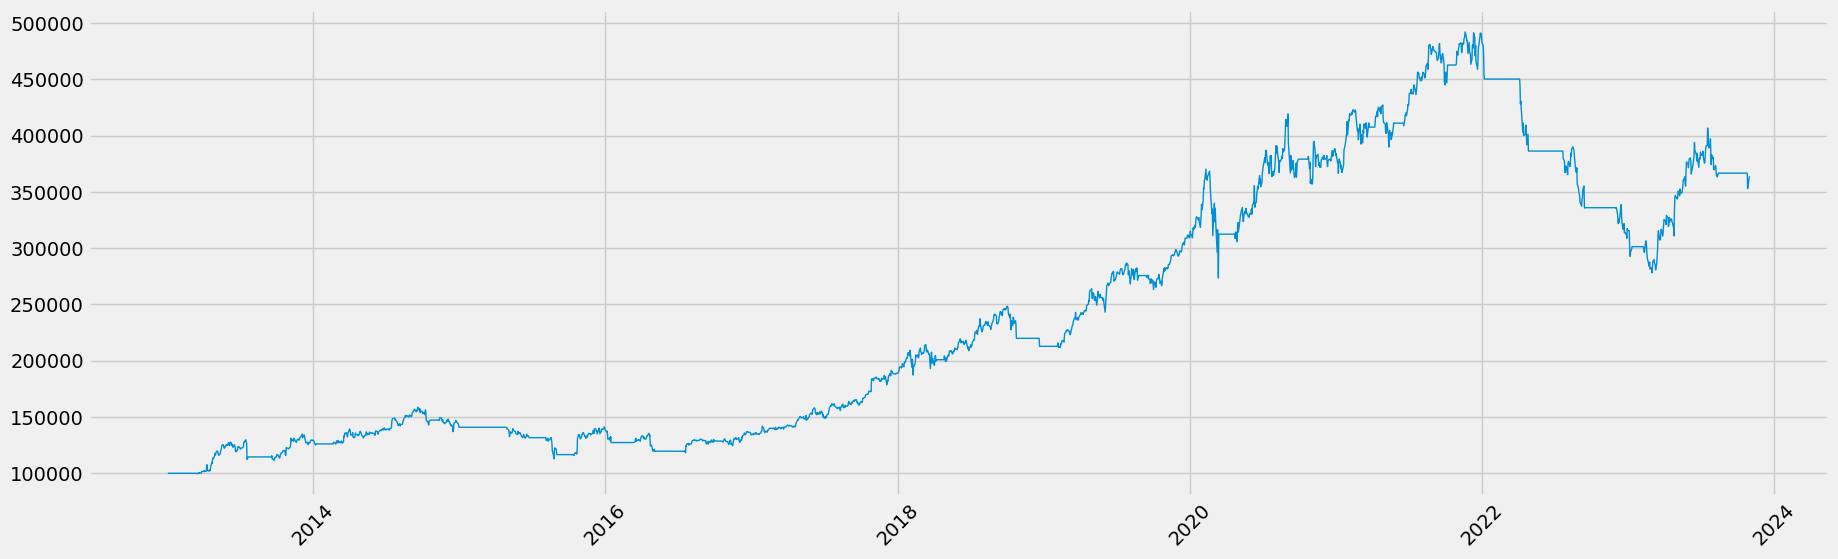

100,000 invested using this strategy for 5 years would have become  363969.43


In [54]:
# Visualize results / PnL
plt.figure(figsize = (20, 6))
plt.plot(data['funds'], linewidth = 1.0)
plt.xticks(rotation=45)
plt.show()

print('100,000 invested using this strategy for 5 years would have become ', round(data.iloc[-1, 3],2))

100,000 invested using this strategy for 5 years would have become  363,969

In [56]:

# Annualized percent returns
n = 365 / 2727
returns = round(100 * ((0.00001 * data.iloc[-1, 3]) ** n - 1), 2)
returns

18.88